Author:- **Bhautik Gondaliya**

mo. no.:- **[9586280240](https://)**

mail id.:- **[mr.genius0180@gmail.com](https://)**
>
>
guide:- **Shivam Mishra**

Sponcerd:- **Intellipaat**
>
>
Title:- **Module-8 Case-Study Supervised ML**

Date:- **17/11/2024**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import fetch_openml

>

# **Linear Regression Model**

### **Predict the salary** of an employee based on the exp. of the employee in no. of years

In [2]:
df = pd.read_csv("Datasets/data.csv")
df.sample(5)

,YearsExperience,Salary
5,2.9,56642.0
27,9.6,112635.0
15,4.9,67938.0
26,9.5,116969.0
11,4.0,55794.0


In [3]:
df.shape

(30, 2)

In [4]:
x = df.iloc[:, [0]]
y = df.iloc[:, 1]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
lr_model = LinearRegression()

In [7]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred = lr_model.predict(x_test)

c:\Users\Bhautik Gondaliaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


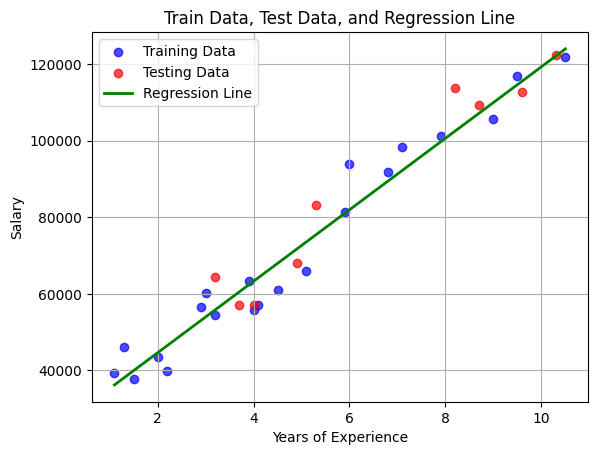

In [34]:
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_line = lr_model.predict(x_line)

# Plot the data
plt.scatter(x_train, y_train, color='blue', label='Training Data', alpha=0.7)
plt.scatter(x_test, y_test, color='red', label='Testing Data', alpha=0.7)
plt.plot(x_line, y_line, color='green', linewidth=2, label='Regression Line')
# plt.plot(x_test, y_pred, color='green', linewidth=2, label='Regression Line')

plt.title('Train Data, Test Data, and Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
r2_score(y_test, y_pred)

0.9414466227178214

>

# **Logistic Regression Model**

### work on XYZ Bank as a ml engineer. **build a system that can recognize hand written digits**

* **Load the MNIST Dataset**: Import the MNIST dataset, which contains images of handwritten digits (0–9).
* **Analyze Data Shape**: Examine the dataset's structure, including the shape of the images and labels.
* **Visualize Images and Labels**: Display some sample images along with their corresponding labels to get an understanding of the data.
* **Train a Model**: Create and train a machine learning or deep learning model to classify the digits.
* **Classify Images**: Use the trained model to make predictions on test data.
* **Evaluate Accuracy with a Confusion Matrix**: Generate a confusion matrix to evaluate the model's performance.
* **Analyze Misclassified Data**: Review some of the images that were incorrectly classified to gain insights and improve the model.

In [78]:
# 1. Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

In [42]:
# 2. Analyze the shape of the data
print("Shape of feature matrix (X):", X.shape)  # 70000 samples, 784 features (28x28 images)
print("Shape of labels (y):", y.shape)          # 70000 labels

Shape of feature matrix (X): (70000, 784)
Shape of labels (y): (70000,)


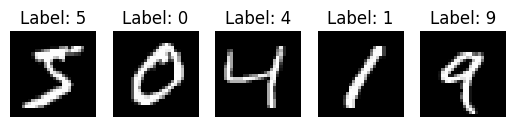

In [71]:
# 3. Visualize some images with labels
fig, axes = plt.subplots(1, 5)
for i, ax in enumerate(axes):
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
logistic_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
logistic_reg.fit(X_train, y_train)

c:\Users\Bhautik Gondaliaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Bhautik Gondaliaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [48]:
y_pred = logistic_reg.predict(X_test)

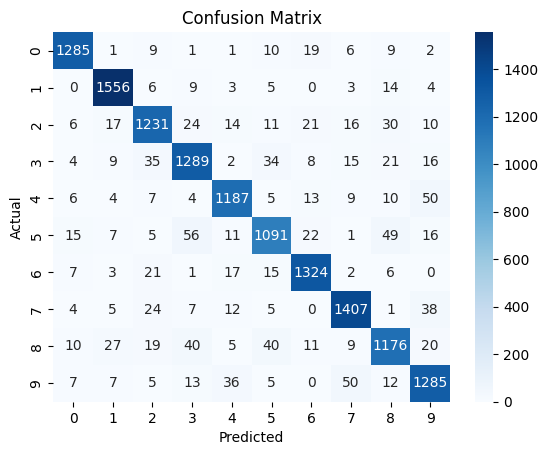

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.89      0.90      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.89      0.86      0.87      1273
           6       0.93      0.95      0.94      1396
           7       0.93      0.94      0.93      1503
           8       0.89      0.87      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



In [54]:
misclassified_indices = np.where(y_test != y_pred)[0]

Examples of misclassified images:


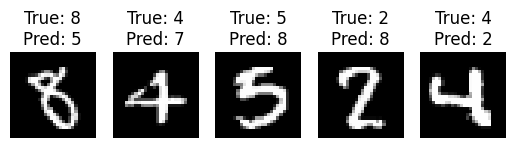

In [76]:
print("Examples of misclassified images:")
fig, axes = plt.subplots(1, 5)
for i, ax in enumerate(axes):
    idx = misclassified_indices[i]
    ax.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test.iloc[idx]}\nPred: {y_pred[idx]}")
    ax.axis('off')
plt.show()

>

# **Dicision Tree & Random Forest Model** 

In [79]:
df = pd.read_csv("Datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [85]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

In [86]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7748917748917749